In [19]:
%matplotlib inline

import uproot
import glob
import pprint
import matplotlib.pyplot as plt


pp = pprint.PrettyPrinter()
files = glob.glob("/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4" + "/**/*.root", recursive=True)
files = [file + ':taus' for file in files]
pp.pprint(files)

testfile = "/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_200000_and_cut_deltaR_bigger_0Point5/DYJetsToLL_M-50_taus.root:taus"
ttree = uproot.open(testfile)
print("")

pp.pprint(f'keys: {ttree.keys()}')
print("")

pp.pprint(f'values: {ttree.values()}')
print("")

#pp.pprint(ttree.arrays())

pp.pprint(ttree.show())
pfCand_pt = ttree['pfCand_pt'].array()
nNodes = [len(x) for x in pfCand_pt]
nEdges = [x*(x-1) for x in nNodes]
# run = ttree['run'].array()
# lumi = ttree['lumi'].array()
# evt = ttree['evt'].array()
# pfCand_eta = ttree['pfCand_eta'].array()
# pfCand_phi = ttree['pfCand_phi'].array()



['/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/WJetsToLNu_invalid.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/WJetsToLNu_taus.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/DYJetsToLL_M-50_invalid.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/WJetsToLNu_muons.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/DYJetsToLL_M-50_electrons.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/DYJetsToLL_M-50_taus.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhiEtaR/DYJetsToLL_M-50_muons.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v4/trimmed_500000_and_added_deltaPhi

In [20]:
a = 0
b = 5

print(f'pfCand_pt: {pfCand_pt[a:b]}')

print(f'graph count: {len(pfCand_pt)}')

print(f'Max node count: {max(nNodes)}')
print(f'Min node count: {min(nNodes)}')

print(f'Max edge count: {max(nEdges)}')
print(f'Min edge count: {min(nEdges)}')

pfCand_pt: [[0.801, 0.736, 0.765, 0.872, 0.771, 0.901, ... 0.754, 0.202, 0.141, 0.511, 0.146]]
graph count: 200000
Max node count: 211
Min node count: 0
Max edge count: 44310
Min edge count: 0


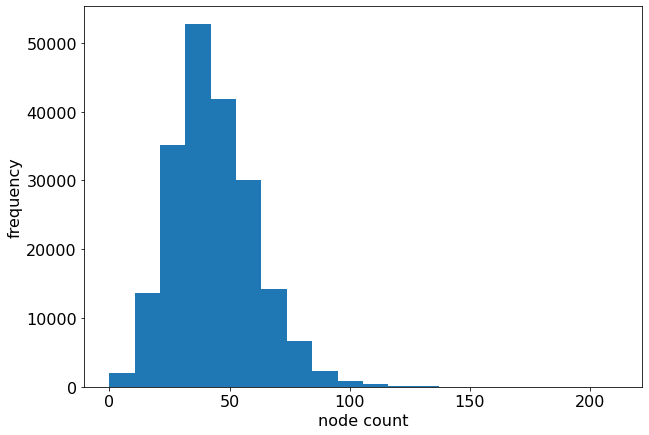

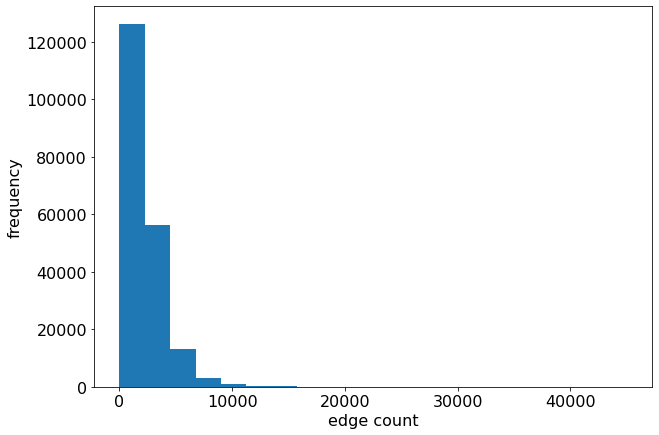

In [22]:
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,7))
plt.hist(nNodes, bins=20)
plt.xlabel("node count")
plt.ylabel("frequency")
plt.savefig("NodeCount.png")
plt.show()

plt.figure(figsize=(10,7))
plt.hist(nEdges, bins=20, range=(0,45000))
plt.xlabel("edge count")
plt.ylabel("frequency")
plt.savefig("EdgeCount.png")
plt.show()

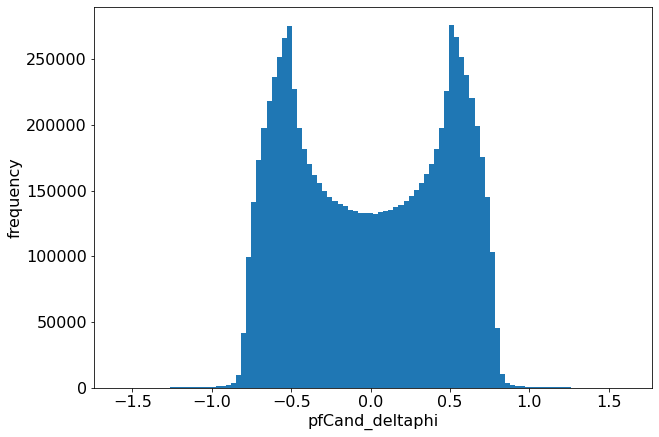

In [23]:
pfCand_deltaPhi = ttree['pfCand_deltaPhi'].array()

import awkward as ak

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_deltaPhi, axis=None), bins=100)
plt.xlabel("pfCand_deltaphi")
plt.ylabel("frequency")
plt.savefig("pfCand_deltaphi.png")
plt.show()

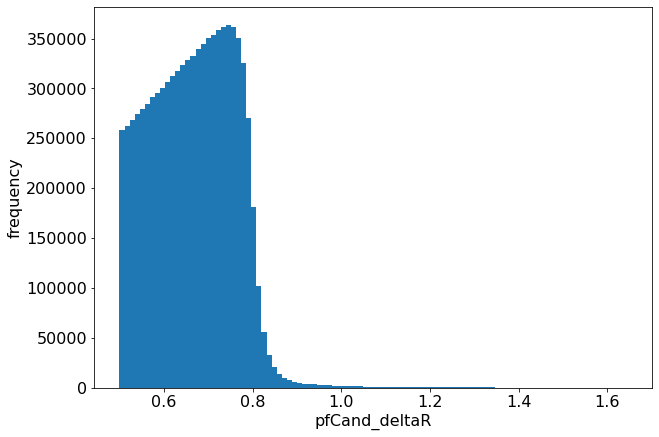

In [24]:
pfCand_deltaR = ttree['pfCand_deltaR'].array()

import awkward as ak

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_deltaR, axis=None), bins=100)
plt.xlabel("pfCand_deltaR")
plt.ylabel("frequency")
plt.savefig("pfCand_deltaR.png")
plt.show()

In [6]:
print(pfCand_puppiWeightNoLep[0:5])
for puppiWeights in pfCand_puppiWeightNoLep[0:5]:
    for p in puppiWeights

print("\n\n")
for pt in pfCand_pt[0:5]:
    print(len(pt))

SyntaxError: invalid syntax (<ipython-input-6-3289ce5fbde7>, line 3)

In [ ]:
pfCand_phi = ttree['pfCand_phi'].array()

for phi in pfCand_phi[0:5]:
    print(phi)

In [ ]:
import awkward as ak

plt.figure(figsize=(10,7))
plt.hist(ak.flatten(pfCand_phi, axis=None), bins=100)
plt.xlabel("phi")
plt.ylabel("frequency")
plt.savefig("phi.png")
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(nNodes_cut, bins=20)
plt.xlabel("node count")
plt.ylabel("frequency")
plt.savefig("NodeCount_cut.png")
plt.show()

plt.figure(figsize=(10,7))
plt.hist(nEdges_cut, bins=20, range=(0,60000))
plt.xlabel("edge count")
plt.ylabel("frequency")
plt.savefig("EdgeCount_cut.png")
plt.show()